# Latent Diritchet Allocation

---

## Topic Modeling - Unsupervised Learning

Leer documentos no etiquetados y obtener un listado de posibles tópicos de manera no supervisada

In [1]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel, LdaMulticore
import nltk
import numpy as np
import spacy
from document import Document
import pandas as pd
import util.log as log
log.init_logger()
from util.graphics.word_cloud import show_word_cloud
from util.graphics.bar import show_bar_graphic
from repository.csv_tools import get_documents, get_data

In [2]:
documents = get_documents('../data.csv')
preprocessed_docs = [document.lemmatized_string for document in documents]

In [3]:
id2token = gensim.corpora.Dictionary(preprocessed_docs)

In [4]:
id2token.filter_extremes(no_below=5, no_above=0.5)
bag_of_words = [id2token.doc2bow(doc) for doc in preprocessed_docs]
bag_of_words_tf_dif = TfidfModel(bag_of_words)[bag_of_words]

In [5]:
lda_model = LdaMulticore(bag_of_words, num_topics=14, id2word=id2token, passes=100, workers=10, iterations = 100, random_state=0)

In [6]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {}\nWords: {}\n'.format(idx, topic))

Topic: 0
Words: 0.056*"plataforma" + 0.038*"modelo" + 0.023*"conocimiento" + 0.021*"red" + 0.018*"ofrecer" + 0.018*"inteligencia" + 0.016*"negocio" + 0.015*"humano" + 0.013*"grande" + 0.012*"efecto"

Topic: 1
Words: 0.024*"tarea" + 0.021*"wikipedia" + 0.019*"voluntario" + 0.019*"favorecer" + 0.015*"emergencia" + 0.014*"conocimiento" + 0.014*"adecuada" + 0.014*"global" + 0.013*"compartir" + 0.011*"apertura"

Topic: 2
Words: 0.029*"largo" + 0.026*"nicho" + 0.025*"cola" + 0.023*"ofrecer" + 0.023*"cualquiera" + 0.022*"demanda" + 0.019*"cantidad" + 0.015*"consumidor" + 0.015*"ahora" + 0.014*"gran"

Topic: 3
Words: 0.040*"cola" + 0.040*"largo" + 0.030*"regla" + 0.028*"cliente" + 0.020*"venta" + 0.014*"oferta" + 0.011*"negocio" + 0.011*"demanda" + 0.010*"nicho" + 0.010*"escasez"

Topic: 4
Words: 0.037*"emergente" + 0.029*"conducta" + 0.025*"organismo" + 0.019*"comportamiento" + 0.019*"complejo" + 0.017*"agente" + 0.017*"desarrollar" + 0.017*"superior" + 0.017*"regla" + 0.015*"simple"

Topic: 

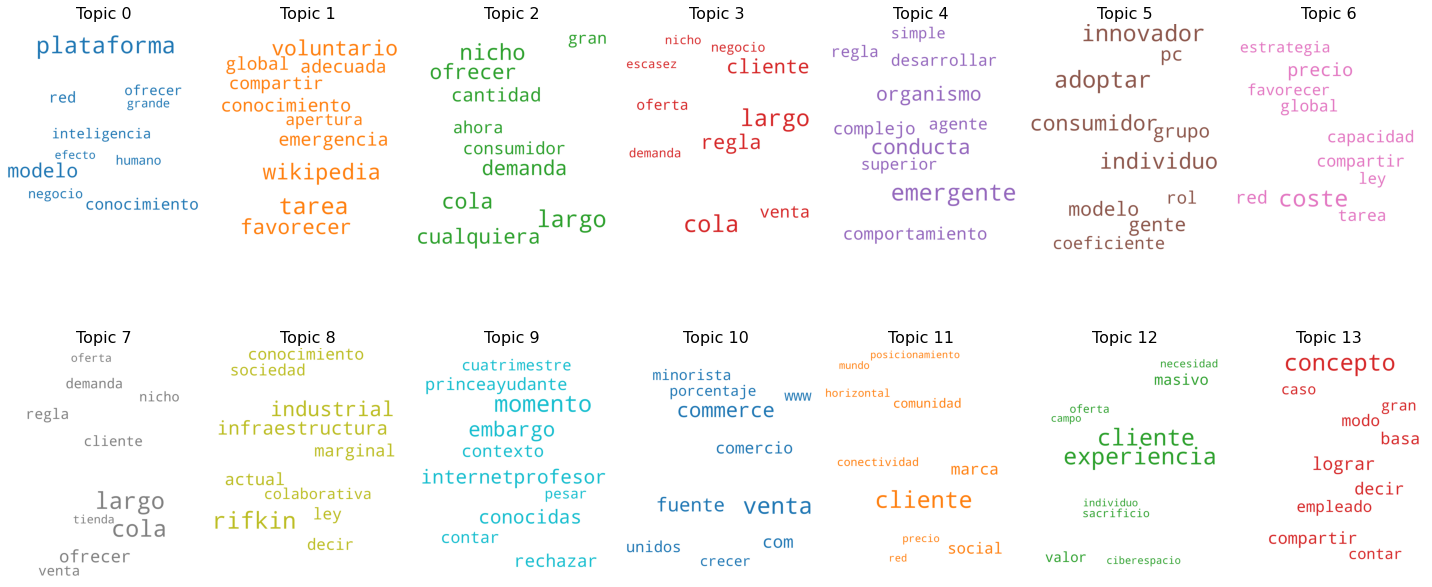

In [7]:
show_word_cloud(lda_model, rows = 2, columns = 7)

In [8]:
def get_topic(model, bow):
    possible_topics = model[bow]
    max = 0
    pmax = 0

    for topic, probability in possible_topics:
        if probability > pmax:
            max = topic
            pmax = probability

    return max 


def get_dictionary(model, bag_of_words):
    topic_counts = {}
    for i in range(len(model.print_topics())):
        topic_counts['{}'.format(i)] = 0

    for bag in bag_of_words:
        topic_counts['{}'.format(get_topic(model, bag))] += 1

    return topic_counts

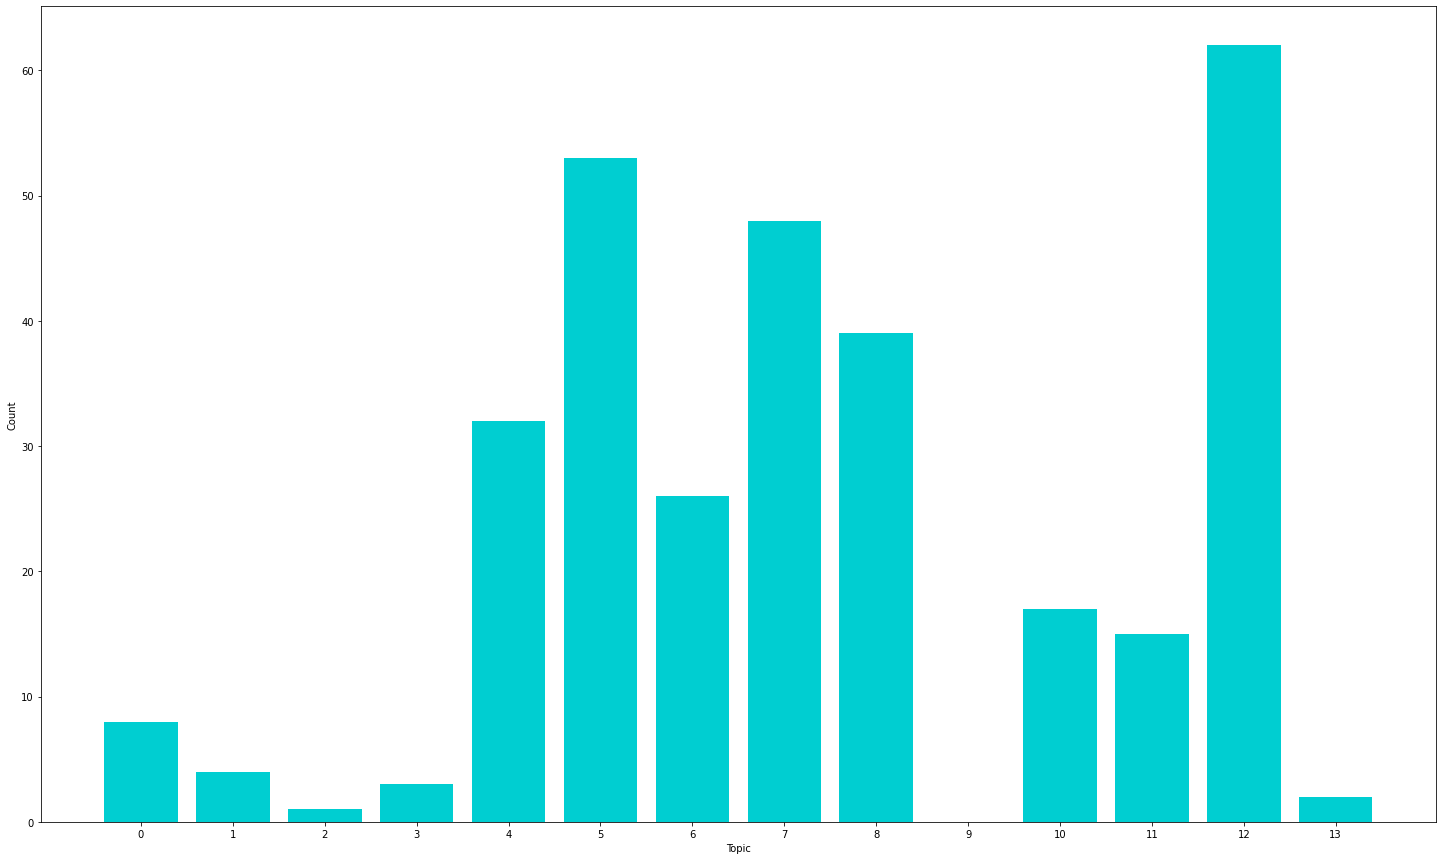

In [9]:
show_bar_graphic(get_dictionary(lda_model, bag_of_words), 'Topic', 'Count')

In [10]:
lda_model2 = LdaMulticore(bag_of_words, num_topics=3, id2word=id2token, passes=100, workers=6, iterations = 100, random_state=0)

In [11]:
for idx, topic in lda_model2.print_topics(-1):
    print('Topic: {}\nWords: {}\n'.format(idx, topic))

Topic: 0
Words: 0.016*"adoptar" + 0.015*"innovador" + 0.015*"consumidor" + 0.014*"individuo" + 0.012*"social" + 0.012*"modelo" + 0.011*"gente" + 0.011*"grupo" + 0.010*"pc" + 0.008*"rol"

Topic: 1
Words: 0.038*"cliente" + 0.023*"experiencia" + 0.017*"largo" + 0.017*"cola" + 0.012*"ofrecer" + 0.009*"valor" + 0.009*"precio" + 0.008*"masivo" + 0.008*"venta" + 0.008*"oferta"

Topic: 2
Words: 0.015*"rifkin" + 0.013*"industrial" + 0.012*"conocimiento" + 0.011*"emergente" + 0.011*"infraestructura" + 0.009*"colaborativa" + 0.009*"actual" + 0.008*"marginal" + 0.008*"conducta" + 0.008*"plataforma"



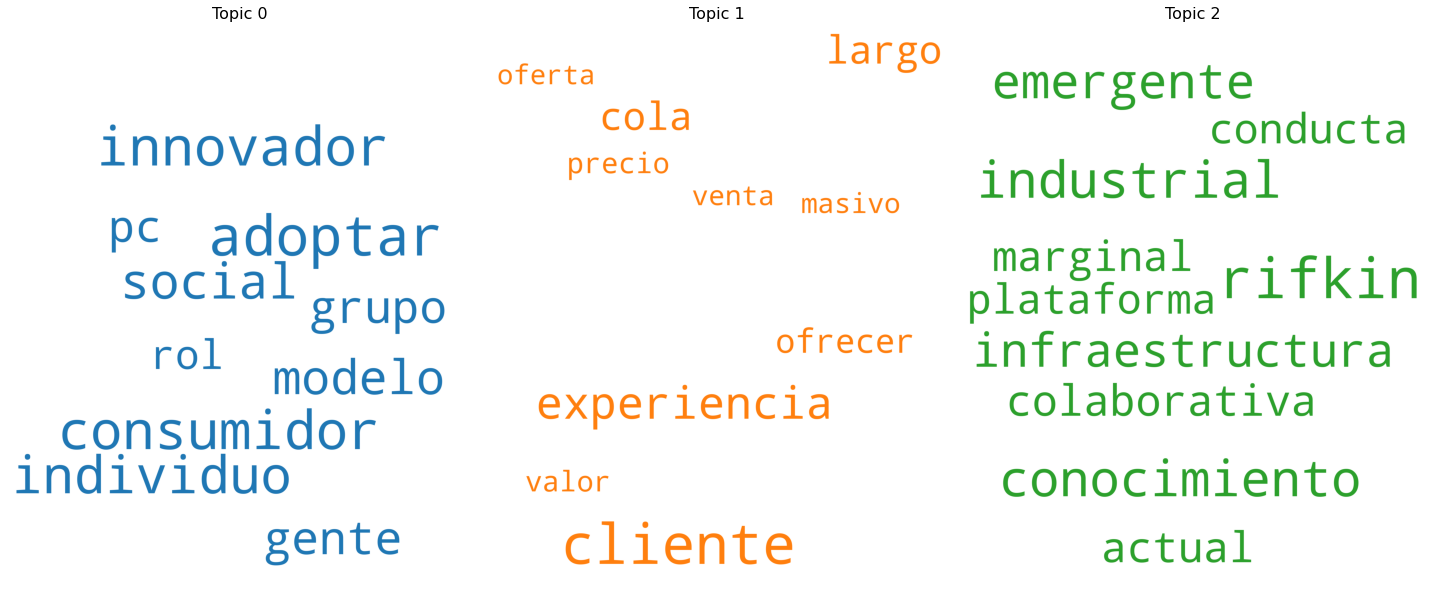

In [13]:
show_word_cloud(lda_model2, rows = 1, columns = 3)

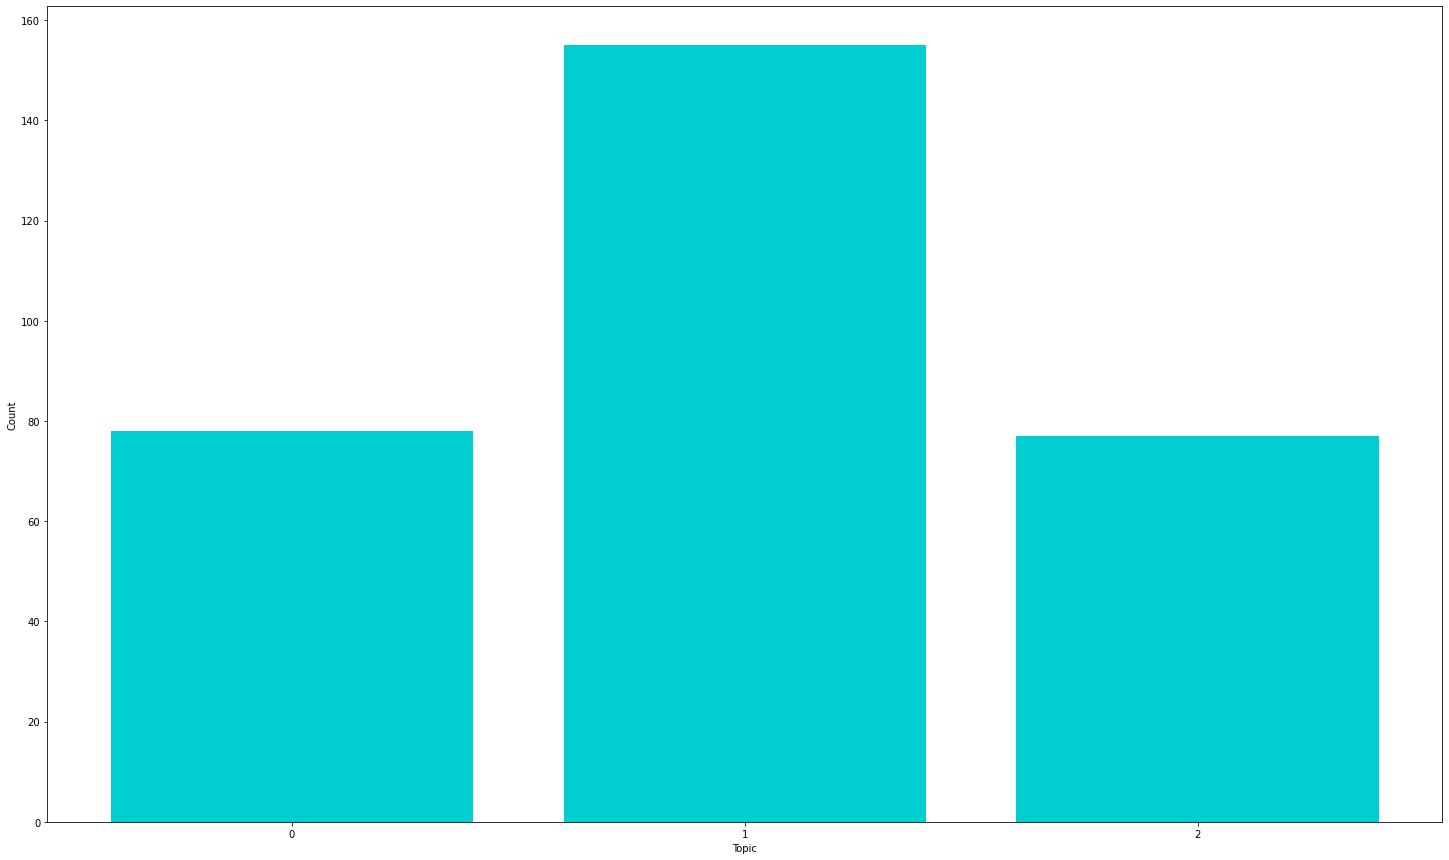

In [12]:
show_bar_graphic(get_dictionary(lda_model2, bag_of_words), 'Topic', 'Count')

In [14]:
import os
def get_test_documents():
    directory = '../test_dataset/'
    files = os.listdir(directory)

    for file in files:
        path = '{}{}'.format(directory, file)
        doc = Document(path = path)
        preprocessed_doc = doc.lemmatized_string
        bow = id2token.doc2bow(preprocessed_doc)
        result = lda_model[bow]
        print('{}: {}'.format(file, result))


get_test_documents()

Adopcion y difusion $ TP 4.doc: [(5, 0.9970519)]
La sociedad de costo marginal cero $ TP5.docx: [(8, 0.9957007)]
Test $ TP5 - Machine, Platform, Cloud - Marina Pross.docx: [(0, 0.99627036)]
La larga cola $ TP2.pdf: [(1, 0.05925425), (7, 0.93625736)]


In [ ]:
from util.graphics.lda_triangle import *
draw_pdf_contours(Dirichlet([1,2,3]))
